In [254]:
import pandas as pd
import numpy as np

In [255]:
%matplotlib inline

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
events_data = pd.read_csv('static/First_contest//event_data_train.csv')

In [258]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [259]:
events_data['data'] = pd.to_datetime(events_data.timestamp, unit='s')

In [260]:
events_data.head(10)

,step_id,timestamp,action,user_id,data
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
5,32811,1434340895,passed,17632,2015-06-15 04:01:35
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19
9,32929,1434340944,passed,17632,2015-06-15 04:02:24


In [261]:
events_data.data.describe()

C:\Users\filip\AppData\Local\Temp\ipykernel_17904\2602695064.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  events_data.data.describe()


count                 3480703
unique                2196932
top       2016-10-12 20:25:38
freq                       21
first     2015-06-15 04:00:48
last      2018-05-19 23:33:31
Name: data, dtype: object

In [262]:
events_data['day'] = events_data.data.dt.date

In [263]:
events_data.head(10)

,step_id,timestamp,action,user_id,data,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01,2015-06-15
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01,2015-06-15
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15


<AxesSubplot: xlabel='day'>

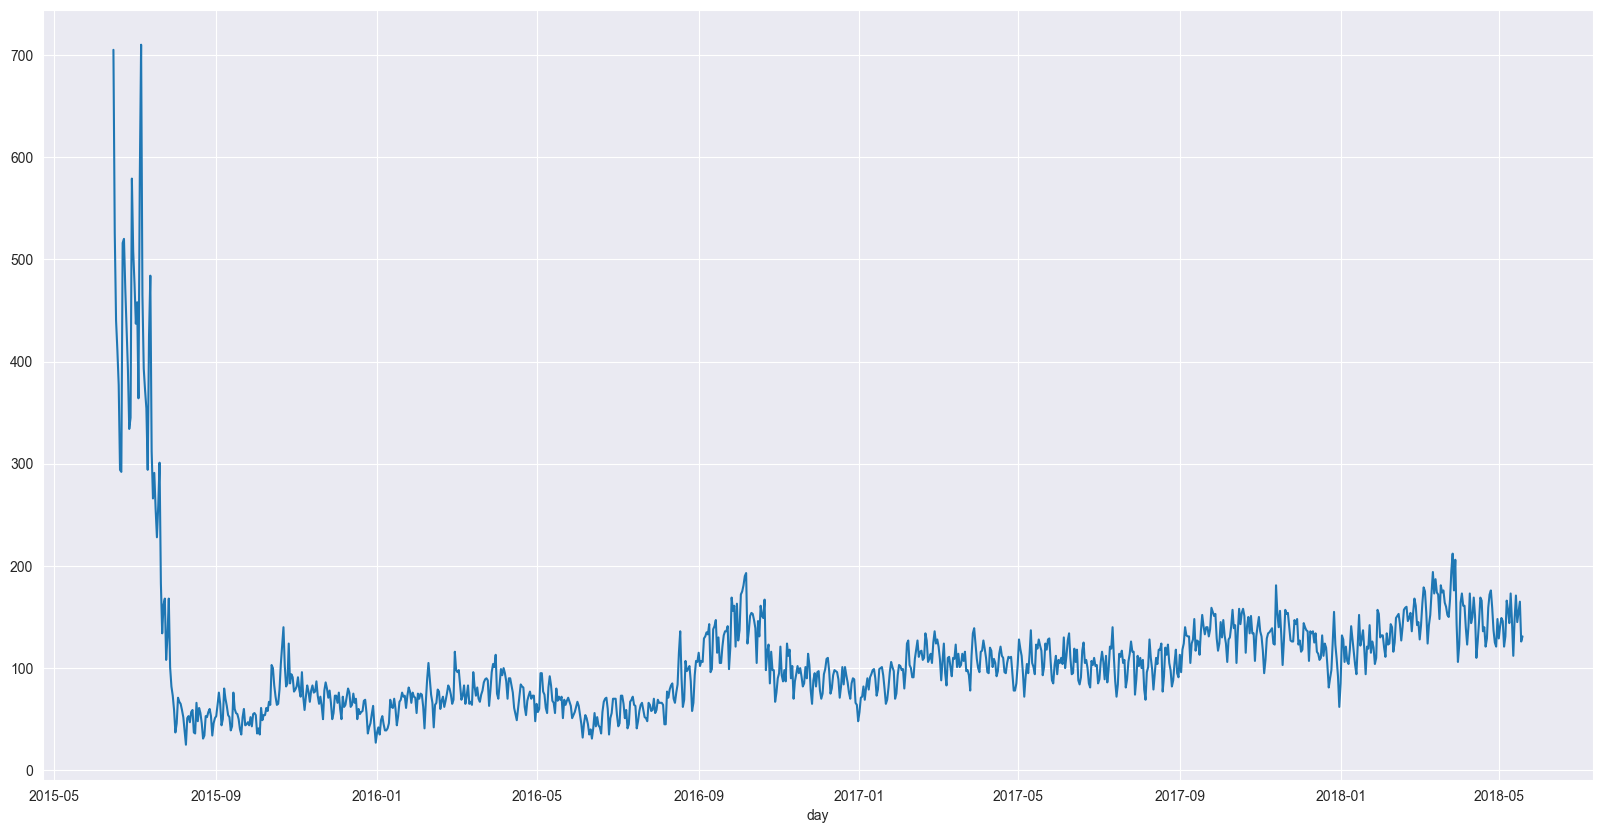

In [264]:
events_data.groupby('day').user_id.nunique().plot(figsize=(20, 10))

<AxesSubplot: >

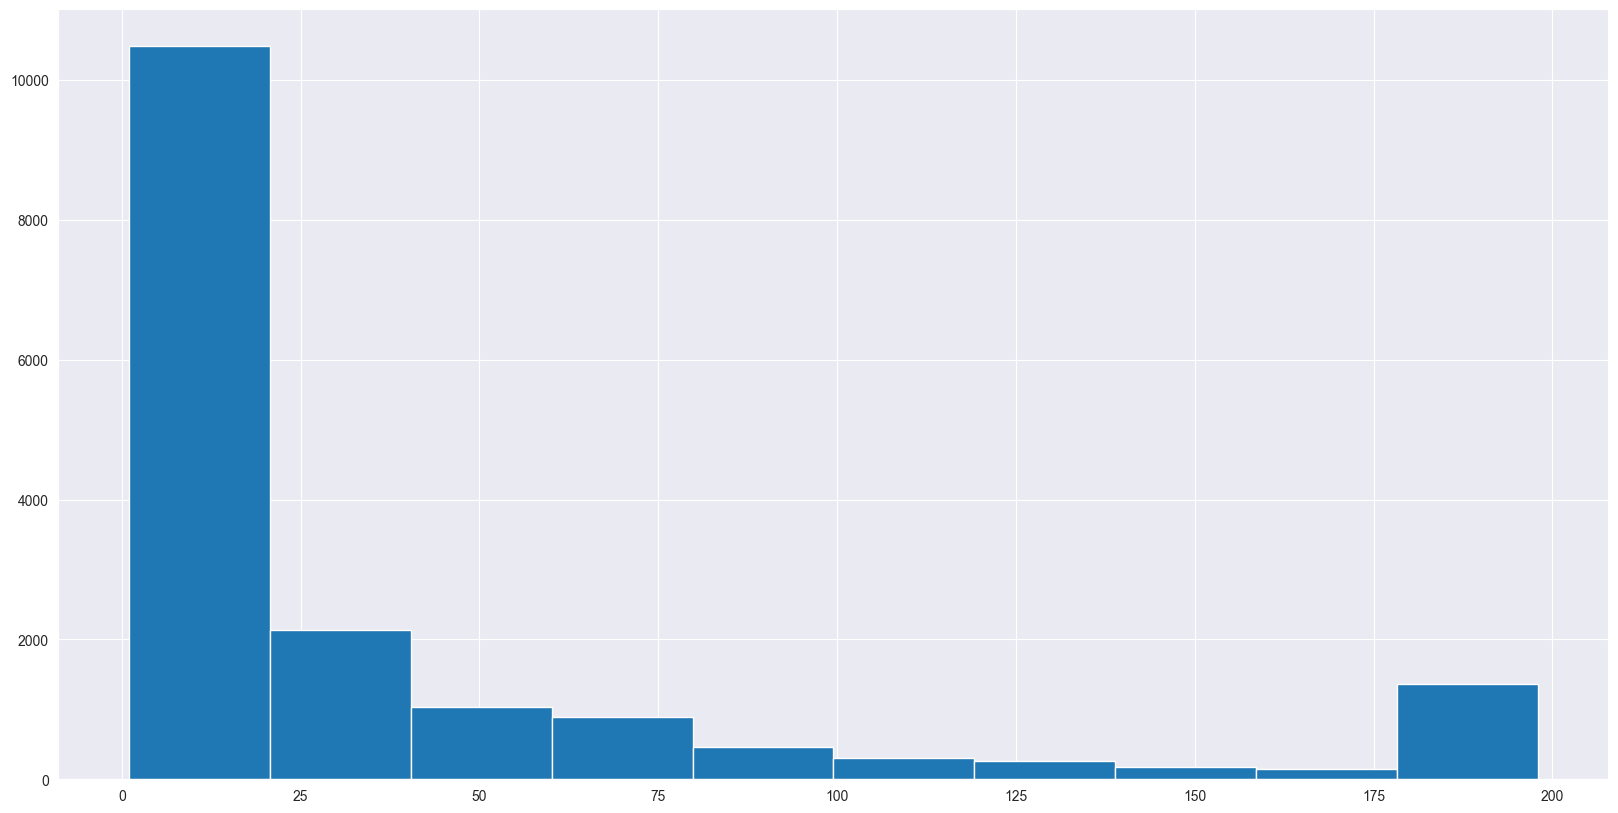

In [265]:
events_data[events_data.action == 'passed'].groupby('user_id', as_index=False) \
    .agg({"step_id": "count"}).rename(columns={'step_id': 'passed_step'}).passed_step.hist(figsize=(20, 10))

In [266]:
users_events_data = events_data.pivot_table(index='user_id',
                                            columns='action',
                                            values='step_id',
                                            aggfunc='count', fill_value=0).reset_index()

In [267]:
submissions_data = pd.read_csv('C:/Users/filip/ML/static/First_contest/submissions_data_train.csv')

In [268]:
submissions_data['data'] = pd.to_datetime(submissions_data.timestamp, unit='s')

In [269]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,data
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03


In [270]:
submissions_data['day'] = submissions_data.data.dt.date

In [271]:
users_scores = submissions_data.pivot_table(index='user_id',
                                            columns='submission_status',
                                            values='step_id',
                                            aggfunc='count', fill_value=0).reset_index()

In [272]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [273]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).groupby('user_id')[
    'timestamp'].apply(list).apply(np.diff).values

In [274]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [275]:
gap_data = gap_data / (24 * 60 * 60)

In [276]:
(24 * 60 * 60 * 30)

2592000

<AxesSubplot: >

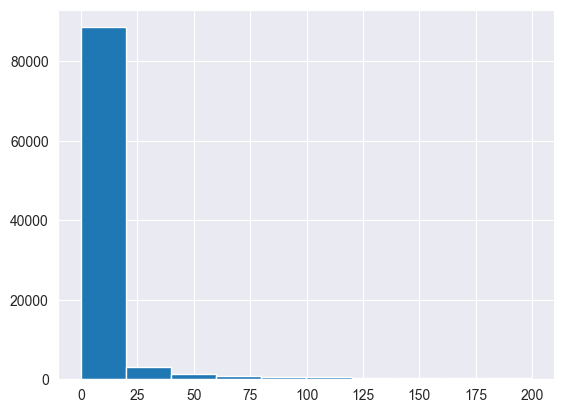

In [277]:
gap_data[gap_data < 200].hist()

In [278]:
gap_data.quantile(0.90)

18.325995370370403

In [279]:
events_data.pivot_table(index='user_id', columns='action', values='step_id',
                        aggfunc='count', fill_value=0).reset_index().sort_values('started_attempt')

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
10166,14118,5,5,0,5
10168,14121,1,0,0,1
10170,14123,1,1,0,6
10171,14125,1,1,0,1
...,...,...,...,...,...
1204,1649,194,194,281,807
4825,6662,198,197,285,1054
6062,8394,131,94,337,1070
2611,3572,194,193,550,6968


In [280]:
events_data.tail()

,step_id,timestamp,action,user_id,data,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [281]:
users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})

In [282]:
now = 1526772811

In [283]:
drop_out_threshold = 2592000

In [284]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [285]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [286]:
users_data = users_data.merge(users_scores, how='outer')

In [287]:
users_data = users_data.fillna(0)

In [288]:
users_data.head(20)

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,0.0,0.0
7,11,1526140625,False,0.0,0.0
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,77.0,106.0


In [87]:
# users_data = users_data.merge(users_eve)

NameError: name 'users_eve' is not defined

In [289]:
users_days = users_data.merge(users_events_data, how='outer')

In [290]:
users_days.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [291]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [292]:
users_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [293]:
users_data = users_data.merge(users_days, how='outer')

In [294]:
users_data = users_data.merge(users_events_data, how='outer')

In [295]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,day,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,1,0,0,1
1,2,1519226966,True,2.0,0.0,2,9,9,2,10
2,3,1444581588,True,29.0,23.0,7,91,87,30,192
3,5,1499859939,True,2.0,2.0,2,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,4,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,1,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,9,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,2,10,10,2,13


In [296]:
users_data['passed_course'] = users_data.passed > 170

In [297]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,day,discovered,passed,started_attempt,viewed
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [298]:
1425 / 17809 * 100

8.001572238755687

In [299]:
users_data[users_data.passed_course].day.median()

20.0

<AxesSubplot: >

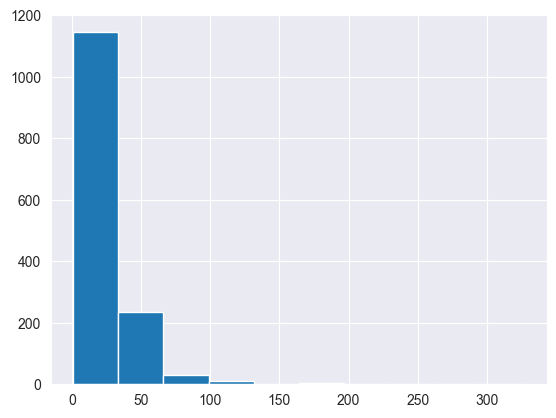

In [300]:
users_data[users_data.passed_course].day.hist()

In [301]:
user_min_time = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'min'}) \
    .rename({'timestamp': 'min_timestamp'}, axis=1)

In [302]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [303]:
users_data = users_data.merge(user_min_time, how='outer')

In [304]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,day,discovered,passed,started_attempt,viewed,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,1,0,0,1,False,1472827464
1,2,1519226966,True,2.0,0.0,2,9,9,2,10,False,1514383364
2,3,1444581588,True,29.0,23.0,7,91,87,30,192,False,1434358476
3,5,1499859939,True,2.0,2.0,2,11,11,4,12,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,1,0,1,False,1521634660
...,...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,4,8,8,1,9,False,1451484016
19230,26793,1510225034,True,0.0,0.0,1,1,0,1,1,False,1510225031
19231,26794,1512035039,True,33.0,9.0,9,69,69,34,180,False,1495287049
19232,26797,1509995096,True,2.0,0.0,2,10,10,2,13,False,1508425316


In [305]:
events_data.head()

,step_id,timestamp,action,user_id,data,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


Находим количество действий пользователя в ближайшие 3 дня

In [306]:
for user_id in users_data.user_id:
    min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
    time_to_threshold = min_user_time * 3 * 24 * 60 * 60

    users_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp < time_to_treshold)]
    break

In [307]:
events_data

,step_id,timestamp,action,user_id,data,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [419]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [420]:
events_data

,step_id,timestamp,action,user_id,data,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950


In [421]:
learning_time_to_threshold = 3 * 24 * 60 * 60
learning_time_to_threshold

259200

In [422]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (
            user_min_time.min_timestamp + learning_time_to_threshold).map(str)
user_learning_time_threshold

0            1_1473086664
1            2_1514642564
2            3_1434617676
3            5_1466416009
4            7_1521893860
               ...       
19229    26790_1451743216
19230    26793_1510484231
19231    26794_1495546249
19232    26797_1508684516
19233    26798_1521234963
Length: 19234, dtype: object

In [423]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [424]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')

In [425]:
events_data.shape

(3480703, 8)

In [426]:
events_data

,step_id,timestamp,action,user_id,data,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950


In [427]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]

In [428]:
events_data_train

,step_id,timestamp,action,user_id,data,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950


In [429]:
submissions_data.mode()

,step_id,timestamp,submission_status,user_id,data,day,users_time,user_learning_time_threshold
0,31978.0,1.491590e+09,wrong,12265,2017-04-07 18:38:33,2015-07-06,21158_1491590313.0,12265_1523211138


In [430]:
events_data_train.groupby('user_id').day.nunique().max()

4

In [431]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [432]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index().rename(columns={'day': 'days'})

In [433]:
X.head()

,user_id,days
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3


In [434]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index().rename(
    columns={'step_id': 'steps_tried'})

In [435]:
steps_tried.head()

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23


In [436]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [437]:
X

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [438]:
X = X.merge(submissions_data_train.pivot_table(index='user_id',
                                               columns='submission_status',
                                               values='step_id',
                                               aggfunc='count', fill_value=0).reset_index(), how='outer')

In [439]:
X

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27
...,...,...,...,...,...
8908,26787,1,3,3,0
8909,26790,1,1,1,0
8910,26794,3,27,31,9
8911,26797,1,2,2,0


In [440]:
X['correct_ration'] = X.correct / (X.correct + X.wrong)

In [441]:
X

,user_id,days,steps_tried,correct,wrong,correct_ration
0,2,1,2,2,0,1.000000
1,3,1,4,4,4,0.500000
2,8,1,11,9,21,0.300000
3,14,1,1,0,1,0.000000
4,16,3,23,23,27,0.460000
...,...,...,...,...,...,...
8908,26787,1,3,3,0,1.000000
8909,26790,1,1,1,0,1.000000
8910,26794,3,27,31,9,0.775000
8911,26797,1,2,2,0,1.000000


In [442]:
X.fillna(0)

,user_id,days,steps_tried,correct,wrong,correct_ration
0,2,1,2,2,0,1.000000
1,3,1,4,4,4,0.500000
2,8,1,11,9,21,0.300000
3,14,1,1,0,1,0.000000
4,16,3,23,23,27,0.460000
...,...,...,...,...,...,...
8908,26787,1,3,3,0,1.000000
8909,26790,1,1,1,0,1.000000
8910,26794,3,27,31,9,0.775000
8911,26797,1,2,2,0,1.000000


In [443]:
X = X.merge(users_data[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [444]:
X = X[~(X.is_gone_user == False) & (X.passed_course == False)]

In [445]:
y = X.passed_course.map(int)
y

0        0
1        0
2        0
3        0
5        0
        ..
19228    0
19229    0
19231    0
19232    0
19233    0
Name: passed_course, Length: 16560, dtype: int64

In [446]:
X = X.drop(['passed_course', 'is_gone_user'], axis=1)

In [447]:
X = X.set_index(X.user_id)
X = X.drop("user_id", axis=1)

In [417]:
X.head()

,days,steps_tried,correct,wrong,correct_ration
user_id,,,,,
2,1.0,2.0,2.0,0.0,1.0
3,1.0,4.0,4.0,4.0,0.5
8,1.0,11.0,9.0,21.0,0.3
14,1.0,1.0,0.0,1.0,0.0
17,1.0,1.0,0.0,2.0,0.0


In [418]:
y

0        0
1        0
2        0
3        0
5        0
        ..
19228    0
19229    0
19231    0
19232    0
19233    0
Name: passed_course, Length: 16560, dtype: int64

In [448]:
X.describe()

,days,steps_tried,correct,wrong,correct_ration
count,6985.000000,6985.000000,6985.00000,6985.000000,6985.000000
mean,1.406013,6.450394,6.35476,6.046385,0.721228
std,0.718411,7.230110,7.24384,12.508697,0.286809
min,1.000000,1.000000,0.00000,0.000000,0.000000
25%,1.000000,2.000000,2.00000,0.000000,0.500000
50%,1.000000,2.000000,2.00000,1.000000,0.750000
75%,2.000000,9.000000,9.00000,6.000000,1.000000
max,4.000000,74.000000,68.00000,188.000000,1.000000


In [379]:
X.value_counts()

days  steps_tried  correct  wrong  correct_ration
1.0   2.0          2.0      0.0    1.000000          1964
      1.0          1.0      0.0    1.000000           468
      2.0          2.0      1.0    0.666667           344
                            2.0    0.500000           120
                            3.0    0.400000            86
                                                     ... 
2.0   9.0          8.0      17.0   0.320000             1
                            13.0   0.380952             1
                            10.0   0.444444             1
                            9.0    0.470588             1
4.0   64.0         65.0     37.0   0.637255             1
Length: 1831, dtype: int64

In [380]:
X.nunique()

days                4
steps_tried        56
correct            56
wrong              99
correct_ration    582
dtype: int64

In [490]:
X = X.fillna(0)
y = y.fillna(0)
print(len(X))
print(len(y))

16560
16560


In [482]:

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


         days  steps_tried  correct  wrong  correct_ration
user_id                                                   
2         1.0          2.0      2.0    0.0             1.0
3         1.0          4.0      4.0    4.0             0.5
8         1.0         11.0      9.0   21.0             0.3
14        1.0          1.0      0.0    1.0             0.0
17        1.0          1.0      0.0    2.0             0.0
...       ...          ...      ...    ...             ...
26773     0.0          0.0      0.0    0.0             0.0
26774     0.0          0.0      0.0    0.0             0.0
26788     0.0          0.0      0.0    0.0             0.0
26789     0.0          0.0      0.0    0.0             0.0
26793     0.0          0.0      0.0    0.0             0.0

[16560 rows x 5 columns]


In [488]:
scores_data = pd.DataFrame()
# max_depth_values = [i for i in range(1, 100)]
# for max_depth in max_depth_values:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=15)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

print({'max_depth': [10][0],
     'train_score': [train_score][0],
     'test_score': [test_score][0],
     'cross_val_score': [mean_cross_val_score][0]})
#
# scores_data_long = pd.melt(scores_data,\
#                            id_vars=['max_depth'],\
#                            value_vars=['train_score', 'test_score', 'cross_val_score'],\
#                            var_name='set_type',\
#                            value_name='score')
#
# sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

{'max_depth': 10, 'train_score': 1.0, 'test_score': 1.0, 'cross_val_score': 1.0}


In [476]:
scores_data.count()

max_depth          99
train_score        99
test_score         99
cross_val_score    99
dtype: int64

In [477]:
scores_data_long.count()

max_depth    297
set_type     297
score        297
dtype: int64